# Project Name - Netflix Movies And TV Shows EDA
Name - Karuna Bhatia

Project Type - Unsupervised

DA Intern


In this project, i'm going to do-

1.Exploratory Data Analysis

2.Understanding what types of content are available in different countries.

3.If Netflix has been increasingly focusing on TV rather than movies in recent years.

Importing Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import datetime as dt

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from  sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

**Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')
data.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


Data Rows And Columns

In [1]:
data.shape

NameError: name 'data' is not defined

Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Duplicate Values

In [ ]:
#Dataset Duplicate Value Count
len(data[data.duplicated()])

0

Missing Values/Null Values

In [ ]:
#Missing Value/Null Value Count
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
#Total Null values in Dataset
data.isnull().sum().sum()

np.int64(3631)

In [ ]:
#Percentage of Null Values for each Feature
data.isnull().mean() * 100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,30.679337
cast,9.220496
country,6.510851
date_added,0.128419
release_year,0.000000
rating,0.089893
duration,0.000000


<Axes: >

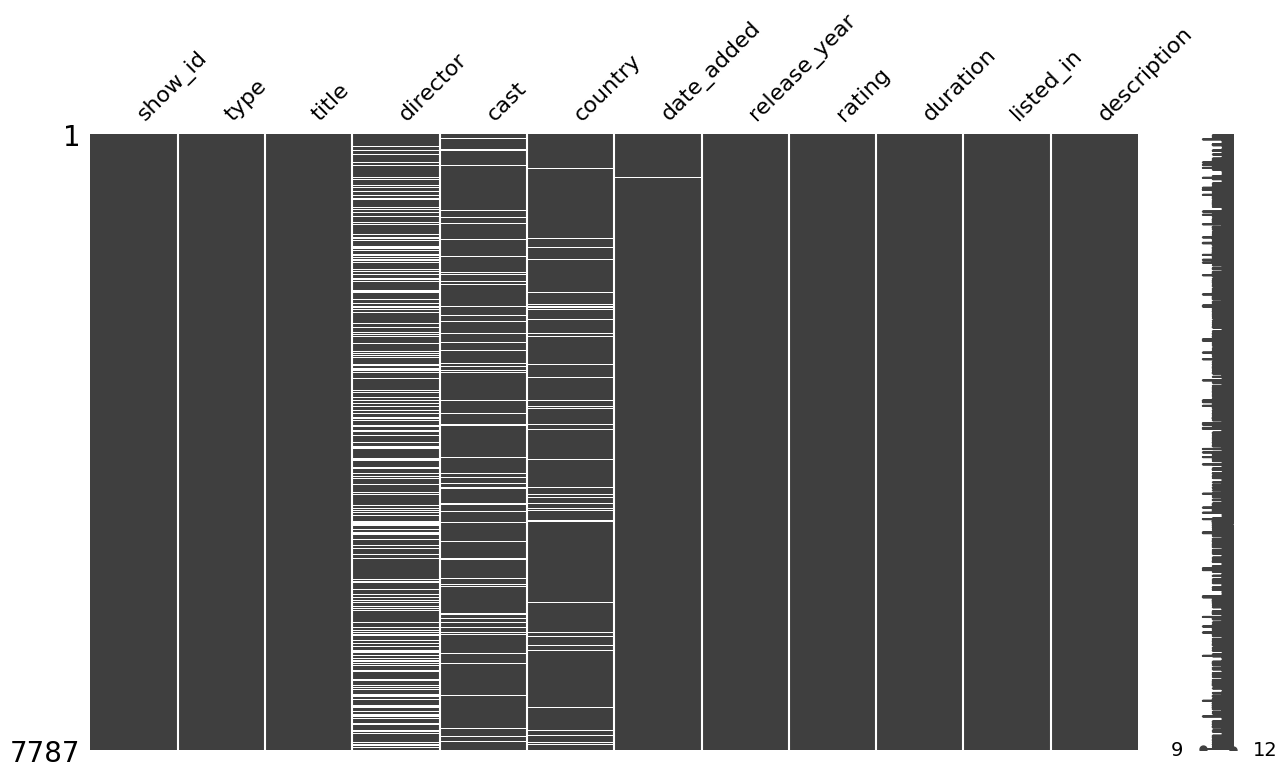

In [ ]:
# Visualizing the missing values
msno.matrix(data,figsize=(15,8))

This dataset contains 7787 observations with 12 features. It has some null values present in director, cast, country, date_added, and rating.

**Understanding Variables**

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s7787,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Description of all the Variables:
show_id :- Unique id for every movies/Tv shows

type :- Identifier - A movie or Tv show

title :- Title of the movie/show

director :- Director of the show

cast :- Actors involved in the show

Country :- Country of production

date_added :- Date is what added on netflix

release_year :- Actual release year of the show

rating :- TV rating of the show

duration :- Total duration in minutes or number of seasons.

listed_in :- Genre

Description :- The summary description


**Checking Unique Values**

In [ ]:
# Check Unique Values for each variable.
variables_data = data.columns.to_list()
for item in variables_data:
  print('The Unique Values of', item, 'are:', data[item].unique())

The Unique Values of show_id are: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
The Unique Values of type are: ['TV Show' 'Movie']
The Unique Values of title are: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
The Unique Values of director are: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
The Unique Values of cast are: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
The Unique Va

In [ ]:
#Checking for non unique values in each column
variable_data=data.columns.to_list()
for item in variable_data:
  print('The Unique Values of', item, 'are:', data[item].nunique())

The Unique Values of show_id are: 7787
The Unique Values of type are: 2
The Unique Values of title are: 7787
The Unique Values of director are: 4049
The Unique Values of cast are: 6831
The Unique Values of country are: 681
The Unique Values of date_added are: 1565
The Unique Values of release_year are: 73
The Unique Values of rating are: 14
The Unique Values of duration are: 216
The Unique Values of listed_in are: 492
The Unique Values of description are: 7769


# Data Wrangling

In [ ]:
#Copying data
df=data.copy()

In [ ]:
#Null values in data
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
# filling the null values of director and cast.
mode_director= df['director'].mode()[0]
df['director'].fillna(mode_director, inplace = True)
df.fillna({'cast':'name missing'}, inplace = True)


# filling the null values of rating and country with their mode.
df['country'].fillna(df ['country'].mode()[0], inplace = True)
df['rating'].fillna(df ['rating'].mode()[0], inplace = True)

#Dropping null vales of date_added
df.dropna(subset=['date_added'], inplace=True)


In [ ]:
# checking the null value counts again.
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.shape

(7777, 12)

In [ ]:
df.date_added.dtype

dtype('O')

In [ ]:
#conversion to date time format from objects
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [ ]:
df['day_added']= df['date_added'].dt.day
df['month_added']=df['date_added'].dt.month
df['year_added']=df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,1.0,2020.0


## Rating

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,2868
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


In [ ]:
# converting rating into understandable format.

rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['rating'] =df['rating'].replace(to_replace = rename_rating)
df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

# **MANIPULATIONS AND INSIGHTS SO FAR:**

1. Made a copy of the original dataset as df.

2. Checked the null value counts of each column.


3. Handled the null values by filling in different values based on the column values. Like, the director,country and rating column has been filled by its mode. The cast is filled by name missing. Apart from that date_added had also some null values so I dropped the null values as missing values present were less than 0.2%.

4. After filling in the null values checked the null value counts again and got 0.


5. Checked the data type of date_added column and converted it into DateTime. Then I extracted the day, month, and year from it. I assigned that value to a new variable like added_day, added_month, and added_year.


6. Converted the rating into an understandable format.

# **Data Vizualization & Experimenting with charts : Understanding Relationships Between Variables**

## Type Counts

<Axes: xlabel='type', ylabel='count'>

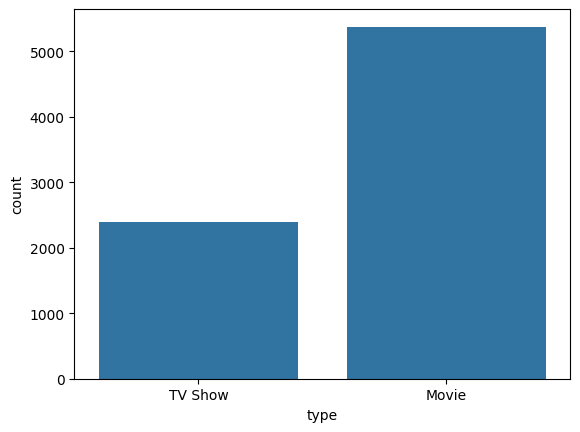

In [ ]:
sns.countplot(x='type',data=df)

I picked a count plot here to see the total counts of each show.

We can clearly see in the count plot here that most of the content added is movies which are approximately 5000. Nearly 2500 contents are TV Shows.

## Top ten countries based on total production

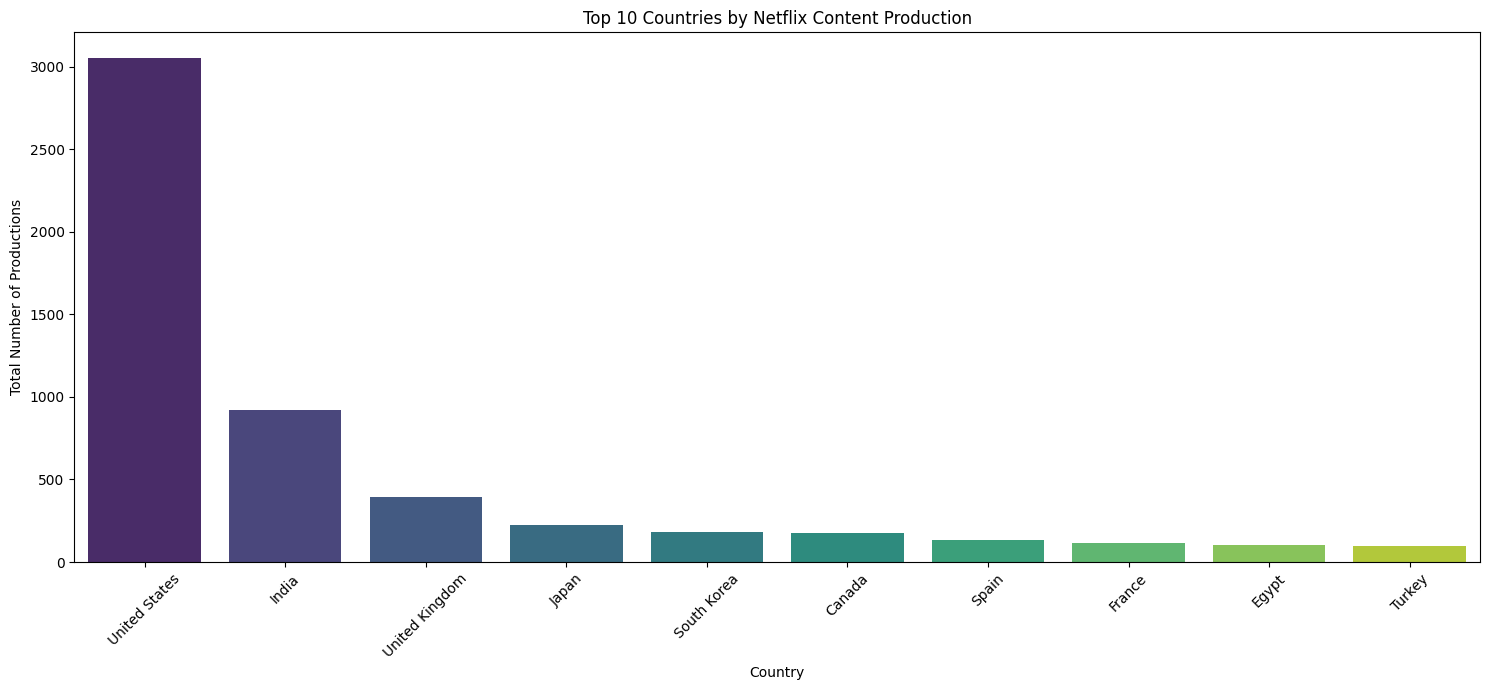

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count content per country
top_countries = df['country'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_countries.columns = ['Country Name', 'Total number of productions']

# Plot
plt.figure(figsize=(15, 7))
sns.barplot(data=top_countries, x='Country Name', y='Total number of productions', palette='viridis')
plt.title('Top 10 Countries by Netflix Content Production')
plt.xticks(rotation=45)
plt.ylabel('Total Number of Productions')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

I wanted to see the top ten countries based on the total production so, I picked a barplot here. Barplot is very useful to see the data through bars with its values.

According to the graph a huge number of contents are produced in the United States followed by India, UK, and Japan. Whereas Spain, France, Egypt, and Turkey have a very less number of production.

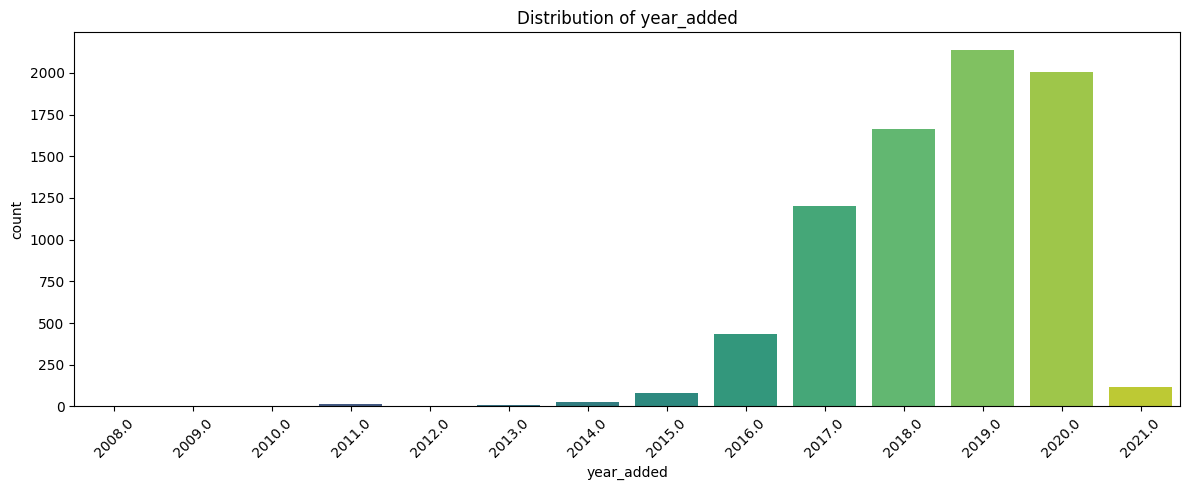

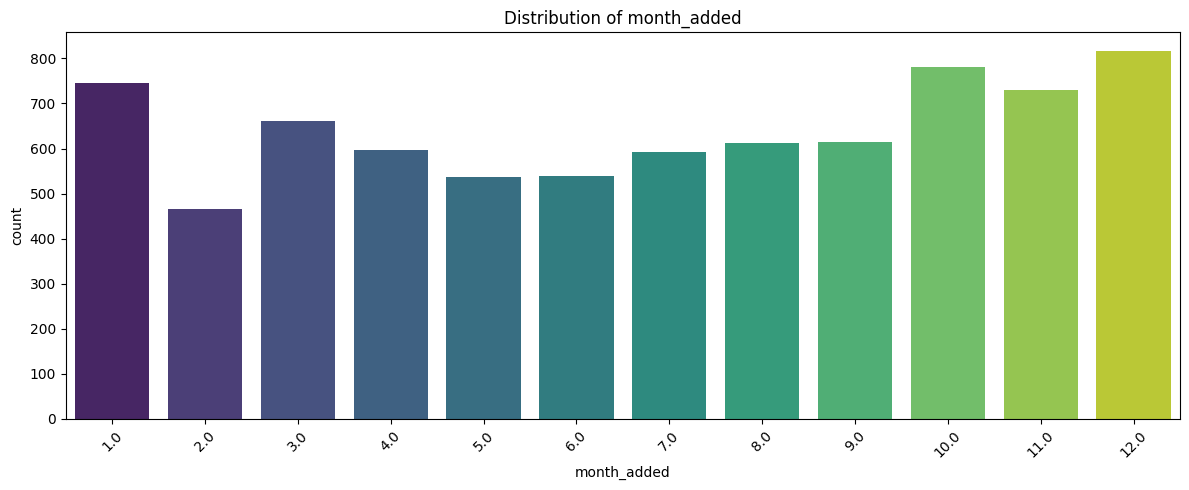

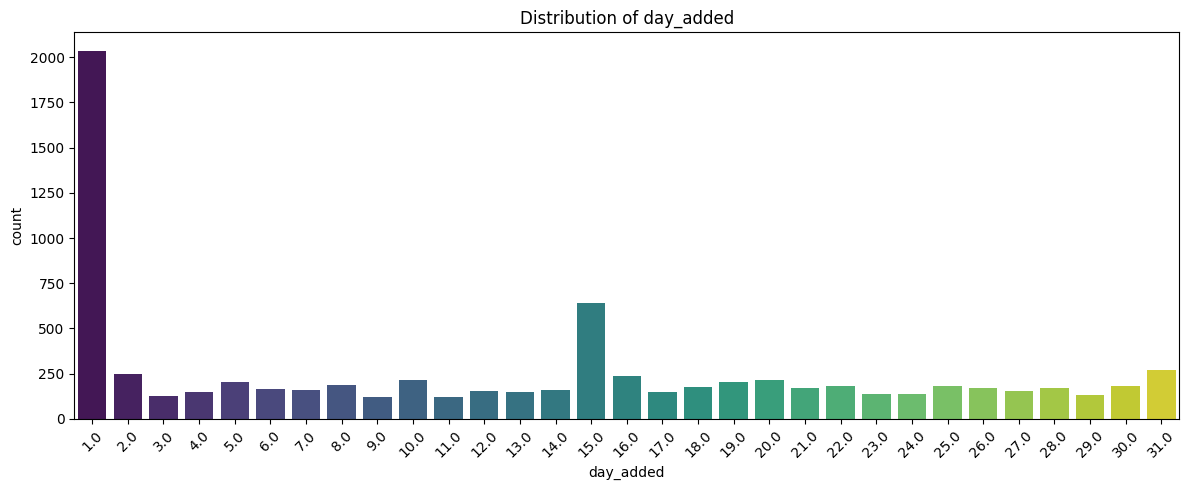

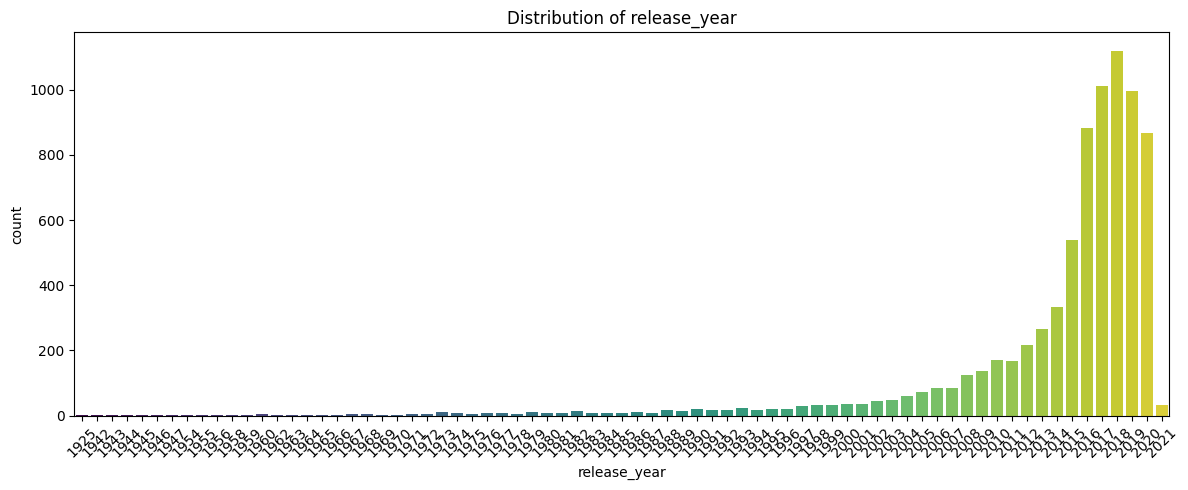

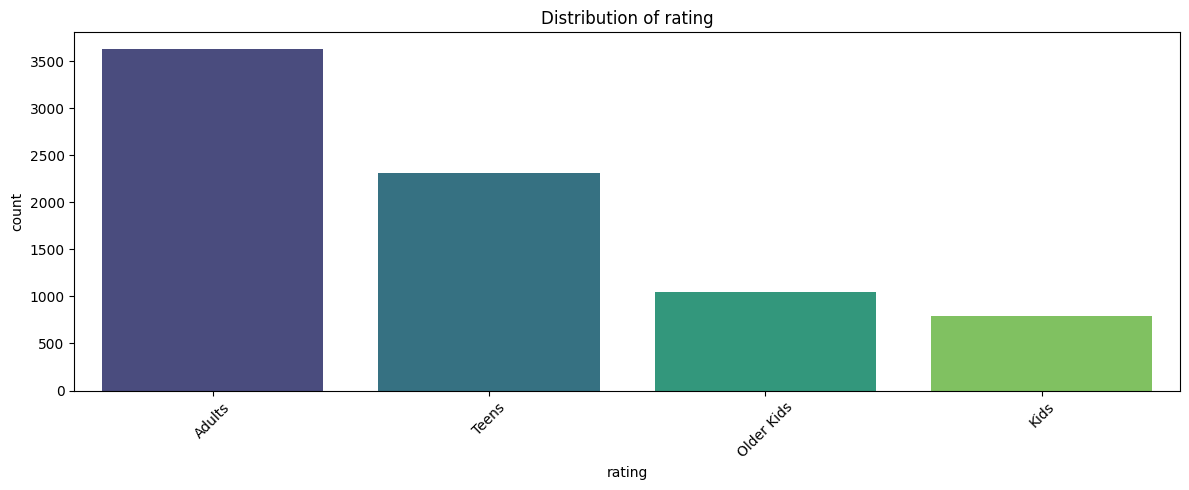

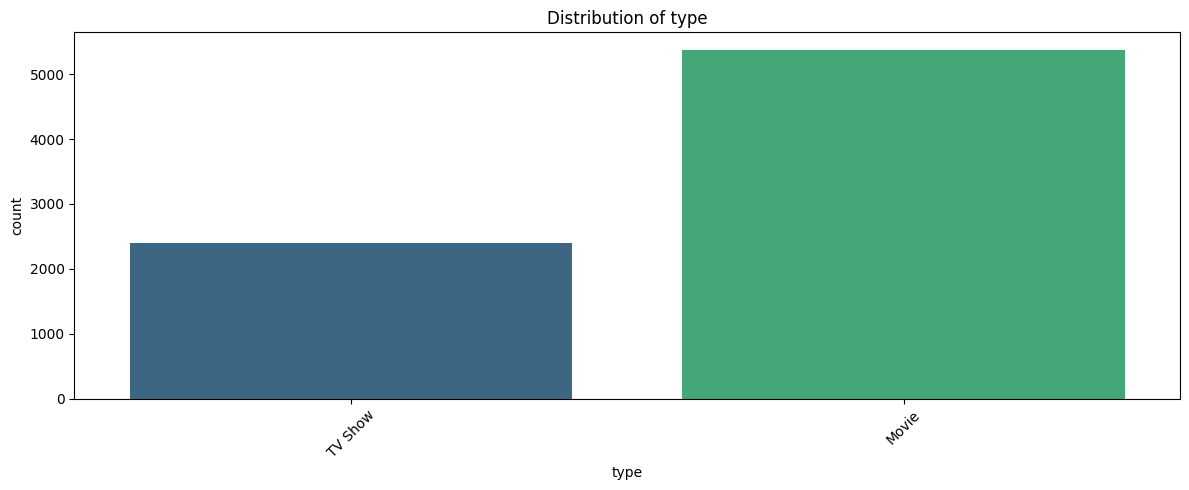

In [ ]:
var = ['year_added', 'month_added', 'day_added', 'release_year', 'rating', 'type']

for col in var:
    plt.figure(figsize=(12, 5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


year_added:- Most of the content on Netflix is added in 2018, 2019, and 2020. In which 2019 the maximum number of contents are added. this was the time when Netflix became prevalent among people. Very few contents are added in 2021 because of the pandemic.

month_added:- Most of the content on Netflix is added in the month of October, November, December, and January. In which most numbers of the contents are added in the month of December. It is evident that in December, peoples usually have vacations that are the reason.
day_added:- Maximum contents are added on the first day of the month followed by the 15th day of the month.

release_year:- The number of contents released per year was increasing constantly but it got decreased in 2021. the reason was none other than the corona various pandemic in which everyone was following the restrictions to curb this virus from spreading.

rating:- Maximum contents of Netflix are only for adults followed by teens. Very few contents are available for kids on Netflix.

type:- Most of the content on Netflix is movies which are approximately 5000. the number of tv shows around 2500 on this platform

Directors

In [ ]:
#visualizing Top Directors
df['director'].unique()

array(['Raúl Campos, Jan Suter', 'Jorge Michel Grau', 'Gilbert Chan', ...,
       'Josef Fares', 'Mozez Singh', 'Sam Dunn'], dtype=object)

In [ ]:
df['director'].value_counts()

,count
director,
"Raúl Campos, Jan Suter",2397
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
...,...
Andrew C. Erin,1
Vibhu Virender Puri,1
Lucien Jean-Baptiste,1


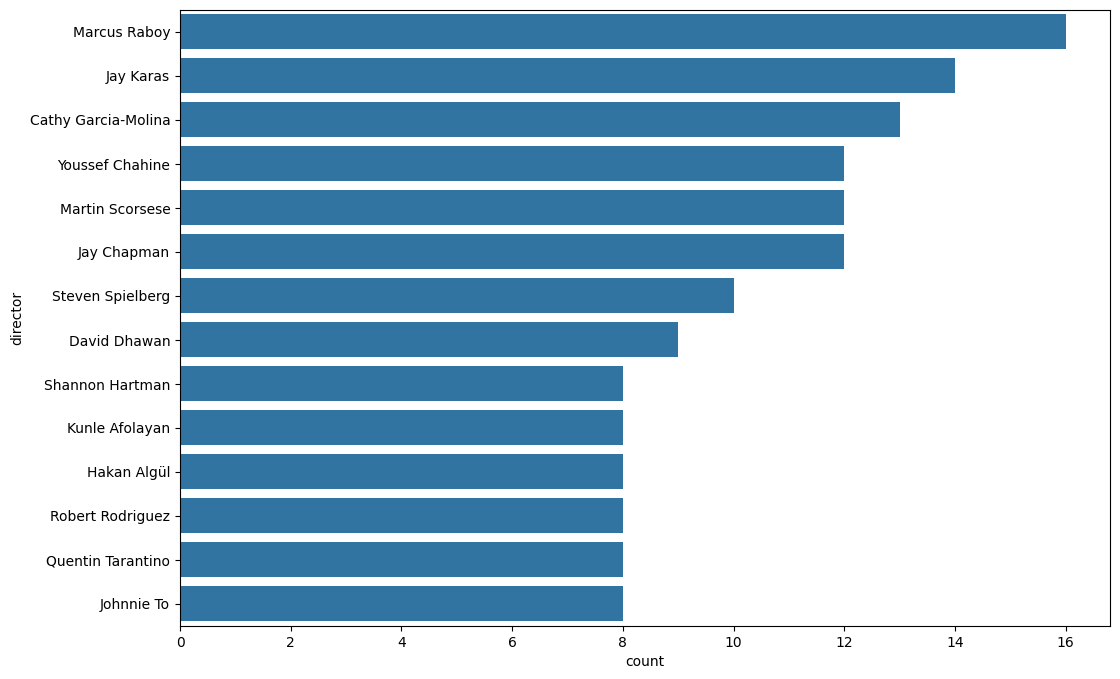

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df['director'], data = df, order = df['director'].value_counts().index[1:15])
plt.show()

Marcus Raboy,Jay Karas,Cathy Molina,Martin,Jay Chapman,David Dhawan, etc are the top directors. It would have been easier to get more insights if some of the values in the director column were not null.

TITLES

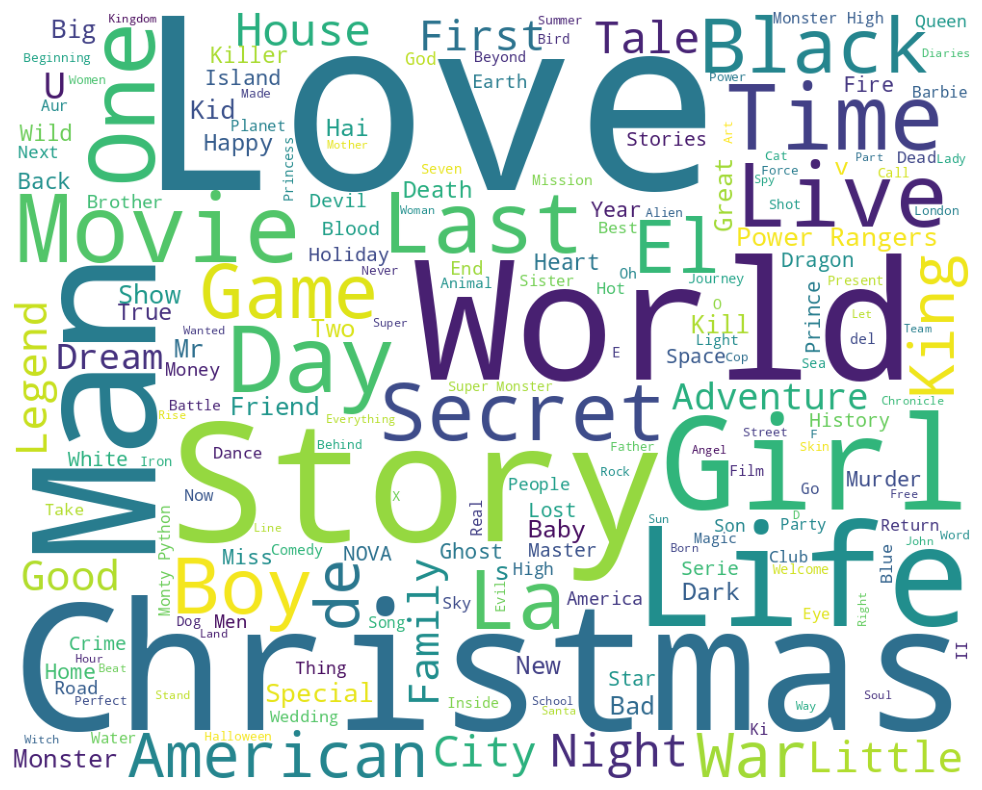

In [ ]:
# most frequent words used in titles.
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Christmas, love, world, story, life, girl, etc are the most frequent words used in the title of the contents.

**Genres**

In [ ]:
df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


<Axes: xlabel='count', ylabel='listed_in'>

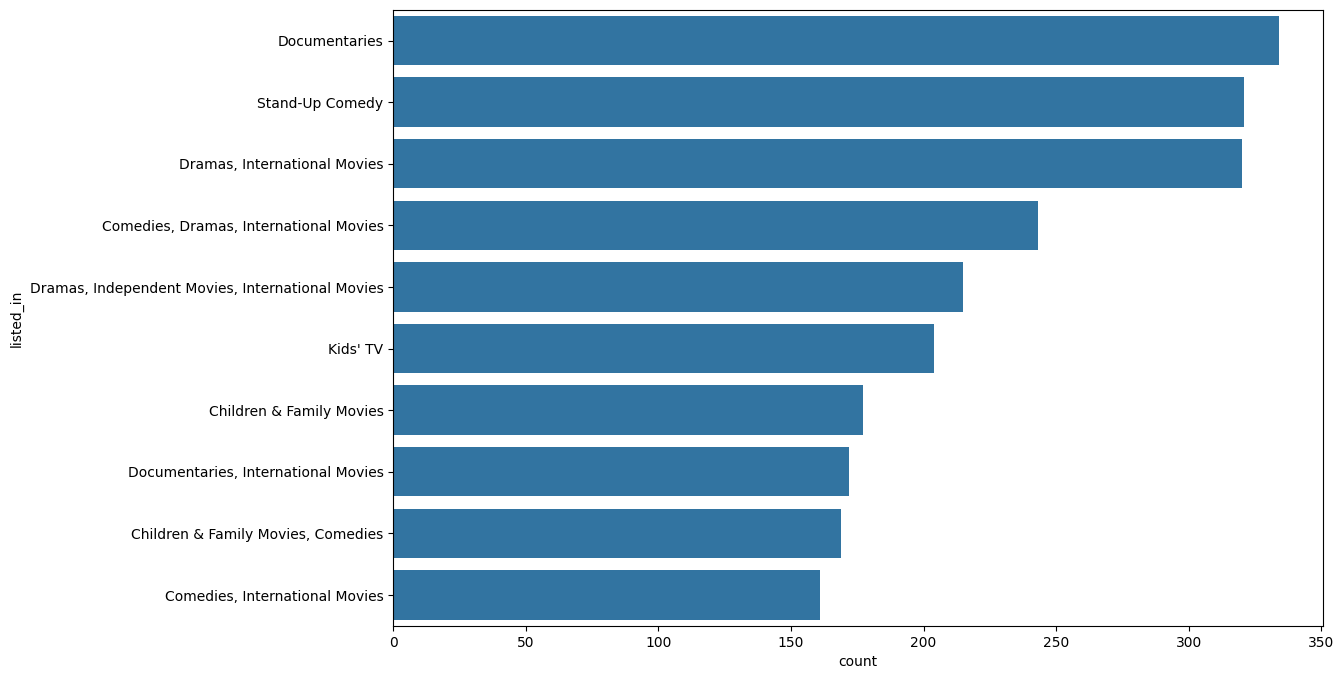

In [ ]:
# visualization oftop ten genres.
plt.figure(figsize = (12,8))
sns.countplot(y=df['listed_in'], data=df, order = df['listed_in'].value_counts().index[:10])

TP 15 GENRES

In [ ]:
# seprating the genres from every content and assigning them to a new genres list.
genres = df['listed_in']
genre_list=[]
for i in genres:
  i=i.split(",")
  for j in i:
    genre_list.append(j)
print(genre_list)

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy', 'Dramas', ' International Movies', 'Horror Movies', ' International Movies', 'Action & Adventure', ' Independent Movies', ' Sci-Fi & Fantasy', 'Dramas', 'International TV Shows', ' TV Dramas', ' TV Mysteries', 'Horror Movies', ' International Movies', 'Dramas', 'Horror Movies', ' International Movies', 'Horror Movies', ' International Movies', ' Thrillers', 'Dramas', ' Thrillers', 'Crime TV Shows', ' International TV Shows', ' TV Dramas', 'Crime TV Shows', ' Docuseries', ' International TV Shows', 'Documentaries', ' International Movies', ' Sports Movies', 'Independent Movies', ' Sci-Fi & Fantasy', ' Thrillers', 'Dramas', ' International Movies', ' Thrillers', 'International TV Shows', ' TV Dramas', 'Dramas', ' Thrillers', 'Comedies', ' Dramas', ' Independent Movies', 'Sports Movies', 'Dramas', ' Independent Movies', ' International Movies', 'Action & Adventure', ' Dramas', ' International Movies', 'Dramas', ' Internation

In [ ]:
# converting genre list into dataframe.
gen_df = pd.DataFrame(genre_list)
gen_df.rename(columns={0:'genres'}, inplace = True)
gen_df.value_counts().head(15)

,count
genres,
International Movies,2323
Dramas,1384
Comedies,1074
Documentaries,751
Dramas,722
Action & Adventure,721
International TV Shows,689
Independent Movies,653
TV Dramas,641


<Axes: xlabel='count', ylabel='genres'>

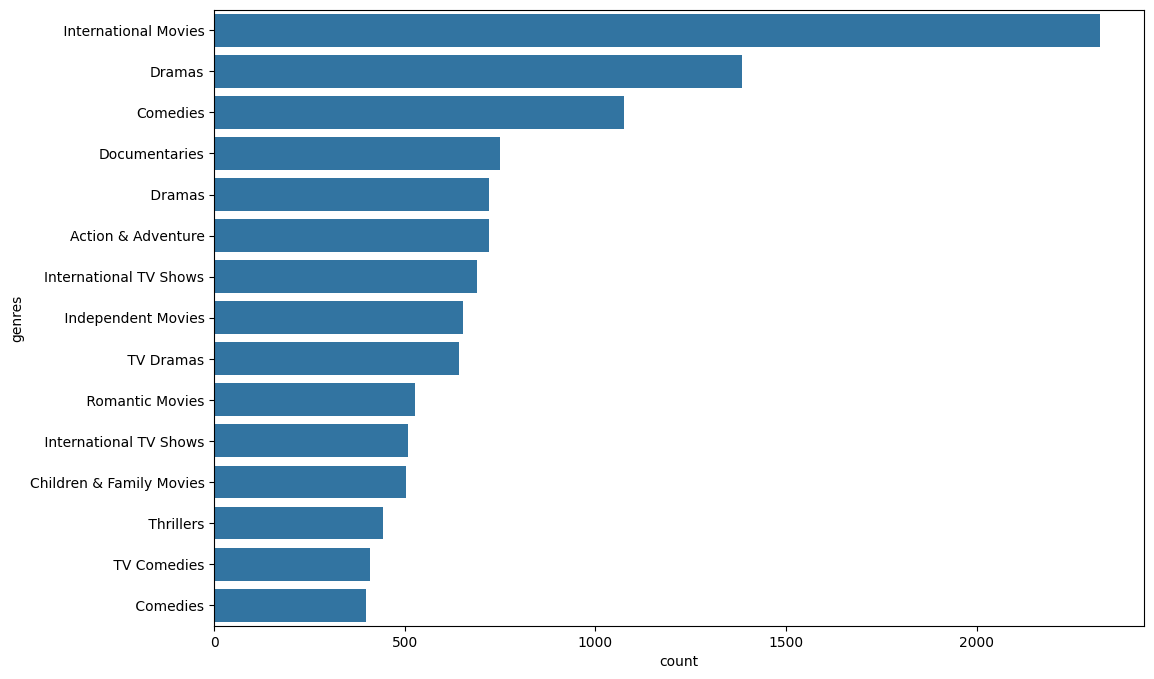

In [ ]:
# Visualization of top 15 genres on netflix.
plt.figure(figsize=(12,8))
sns.countplot(y=gen_df['genres'], data=gen_df, order = gen_df['genres'].value_counts().index[:15])

As we can see in the above-count plot, international movies, dramas, comedies, and action & adventure are some of the top genres.

**Cast**

In [ ]:
# extracting top crew members from cast.
crew_list=[]
for i in df['cast']:
  i=i.split(',')
  for j in i:
    crew_list.append(j)
print(crew_list)

['João Miguel', ' Bianca Comparato', ' Michel Gomes', ' Rodolfo Valente', ' Vaneza Oliveira', ' Rafael Lozano', ' Viviane Porto', ' Mel Fronckowiak', ' Sergio Mamberti', ' Zezé Motta', ' Celso Frateschi', 'Demián Bichir', ' Héctor Bonilla', ' Oscar Serrano', ' Azalia Ortiz', ' Octavio Michel', ' Carmen Beato', 'Tedd Chan', ' Stella Chung', ' Henley Hii', ' Lawrence Koh', ' Tommy Kuan', ' Josh Lai', ' Mark Lee', ' Susan Leong', ' Benjamin Lim', 'Elijah Wood', ' John C. Reilly', ' Jennifer Connelly', ' Christopher Plummer', ' Crispin Glover', ' Martin Landau', ' Fred Tatasciore', ' Alan Oppenheimer', ' Tom Kane', 'Jim Sturgess', ' Kevin Spacey', ' Kate Bosworth', ' Aaron Yoo', ' Liza Lapira', ' Jacob Pitts', ' Laurence Fishburne', ' Jack McGee', ' Josh Gad', ' Sam Golzari', ' Helen Carey', ' Jack Gilpin', 'Erdal Beşikçioğlu', ' Yasemin Allen', ' Melis Birkan', ' Saygın Soysal', ' Berkan Şal', ' Metin Belgin', ' Ayça Eren', ' Selin Uludoğan', ' Özay Fecht', ' Suna Yıldızoğlu', 'Amina Khal

In [ ]:
# converting the list into dataframe
crew_df = pd.DataFrame(crew_list)
crew_df.rename(columns = {0:'actr_actrs'}, inplace = True)
crew_df

,actr_actrs
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
56599,Chittaranjan Tripathy
56600,Nasty C
56601,Adriano Zumbo
56602,Rachel Khoo


<Axes: xlabel='count', ylabel='actr_actrs'>

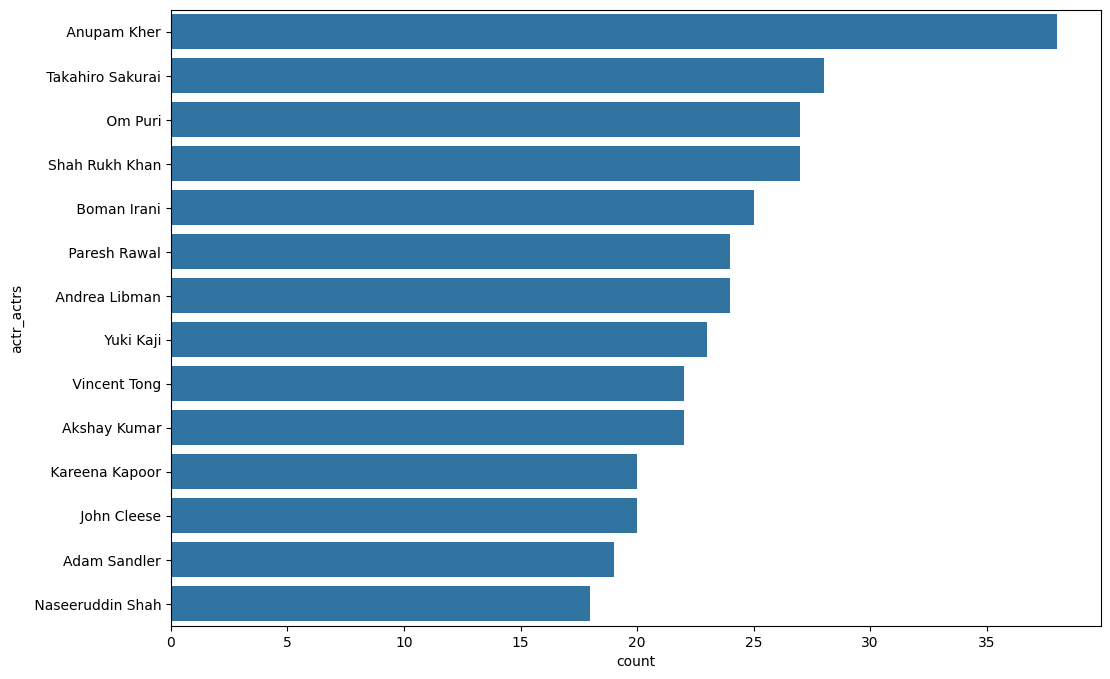

In [ ]:
# top 15 actor or actress on netflix.
plt.figure(figsize=(12,8))
sns.countplot(y= crew_df['actr_actrs'], data = crew_df, order = crew_df['actr_actrs'].value_counts().index[1:15])

Anupam Kher, Takahiro Sakurai, Shah Rukh Khan, Boman Irani, etc are some of the top actors on Netflix. I had also some null values present in the cast column. It would have been easier to get more insights if some of the values in the cast column were not null.

Movie Duration

In [ ]:
# separating the movies data from type column.
movie_df = df[df['type']=='Movie']['duration'].apply(lambda x: x.split(" ")[0]).reset_index()
movie_df

,index,duration
0,1,93
1,2,78
2,3,80
3,4,123
4,6,95
...,...,...
5372,7781,88
5373,7782,99
5374,7783,111
5375,7784,44


<Axes: xlabel='duration', ylabel='Density'>

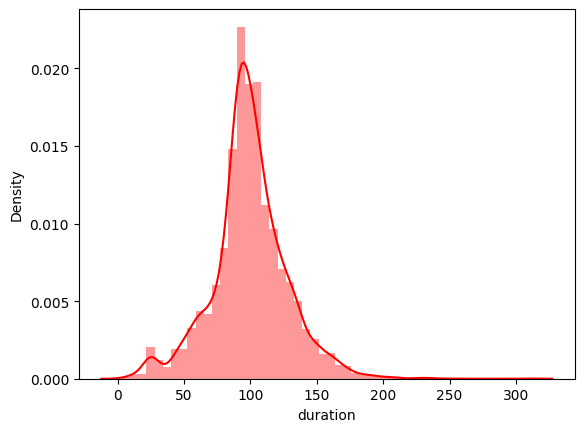

In [ ]:
# Visualization of movies duration distribution.
sns.distplot(movie_df['duration'], color = 'red')

The range duration of the movies on Netflix is between 50 to 150 minutes. There are also some movies of 300 minutes.

## TV SHOWS DURATION

In [ ]:
# tv show df.
tv_df = df[df['type']=='TV Show']
tv_df['duration'].value_counts()

,count
duration,
1 Season,1608
2 Seasons,378
3 Seasons,183
4 Seasons,86
5 Seasons,57
6 Seasons,30
7 Seasons,19
8 Seasons,18
9 Seasons,8


<Axes: xlabel='count', ylabel='duration'>

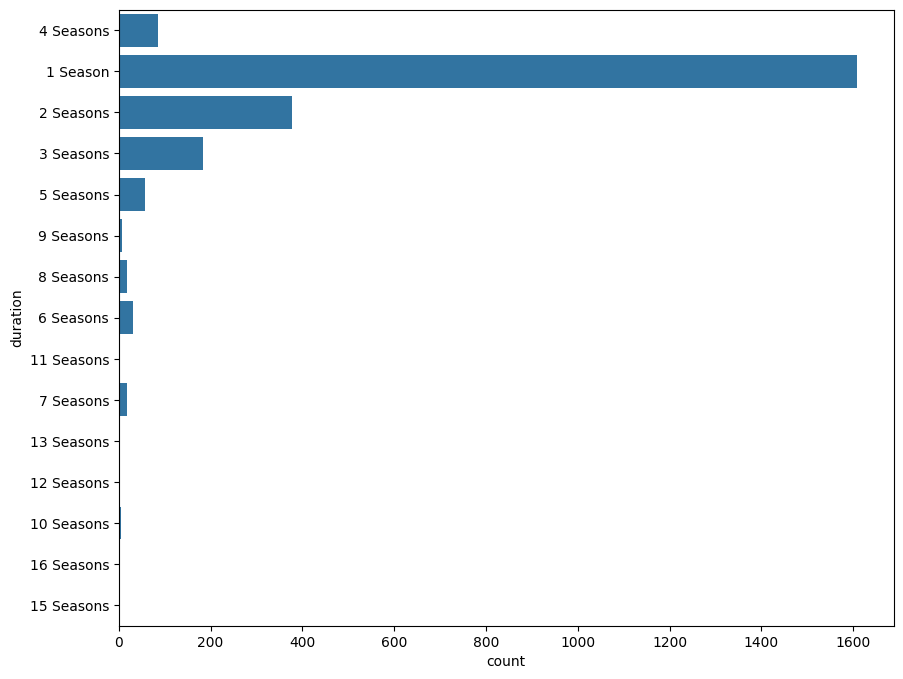

In [ ]:
# visualization of tv show duration.
plt.figure(figsize=(10,8))
sns.countplot(y = tv_df['duration'])

Most TV Shows has only 1 or 2 seasons. There are only few TV Shows with more than 2 seasons.

## Counts with respect to Type of Content

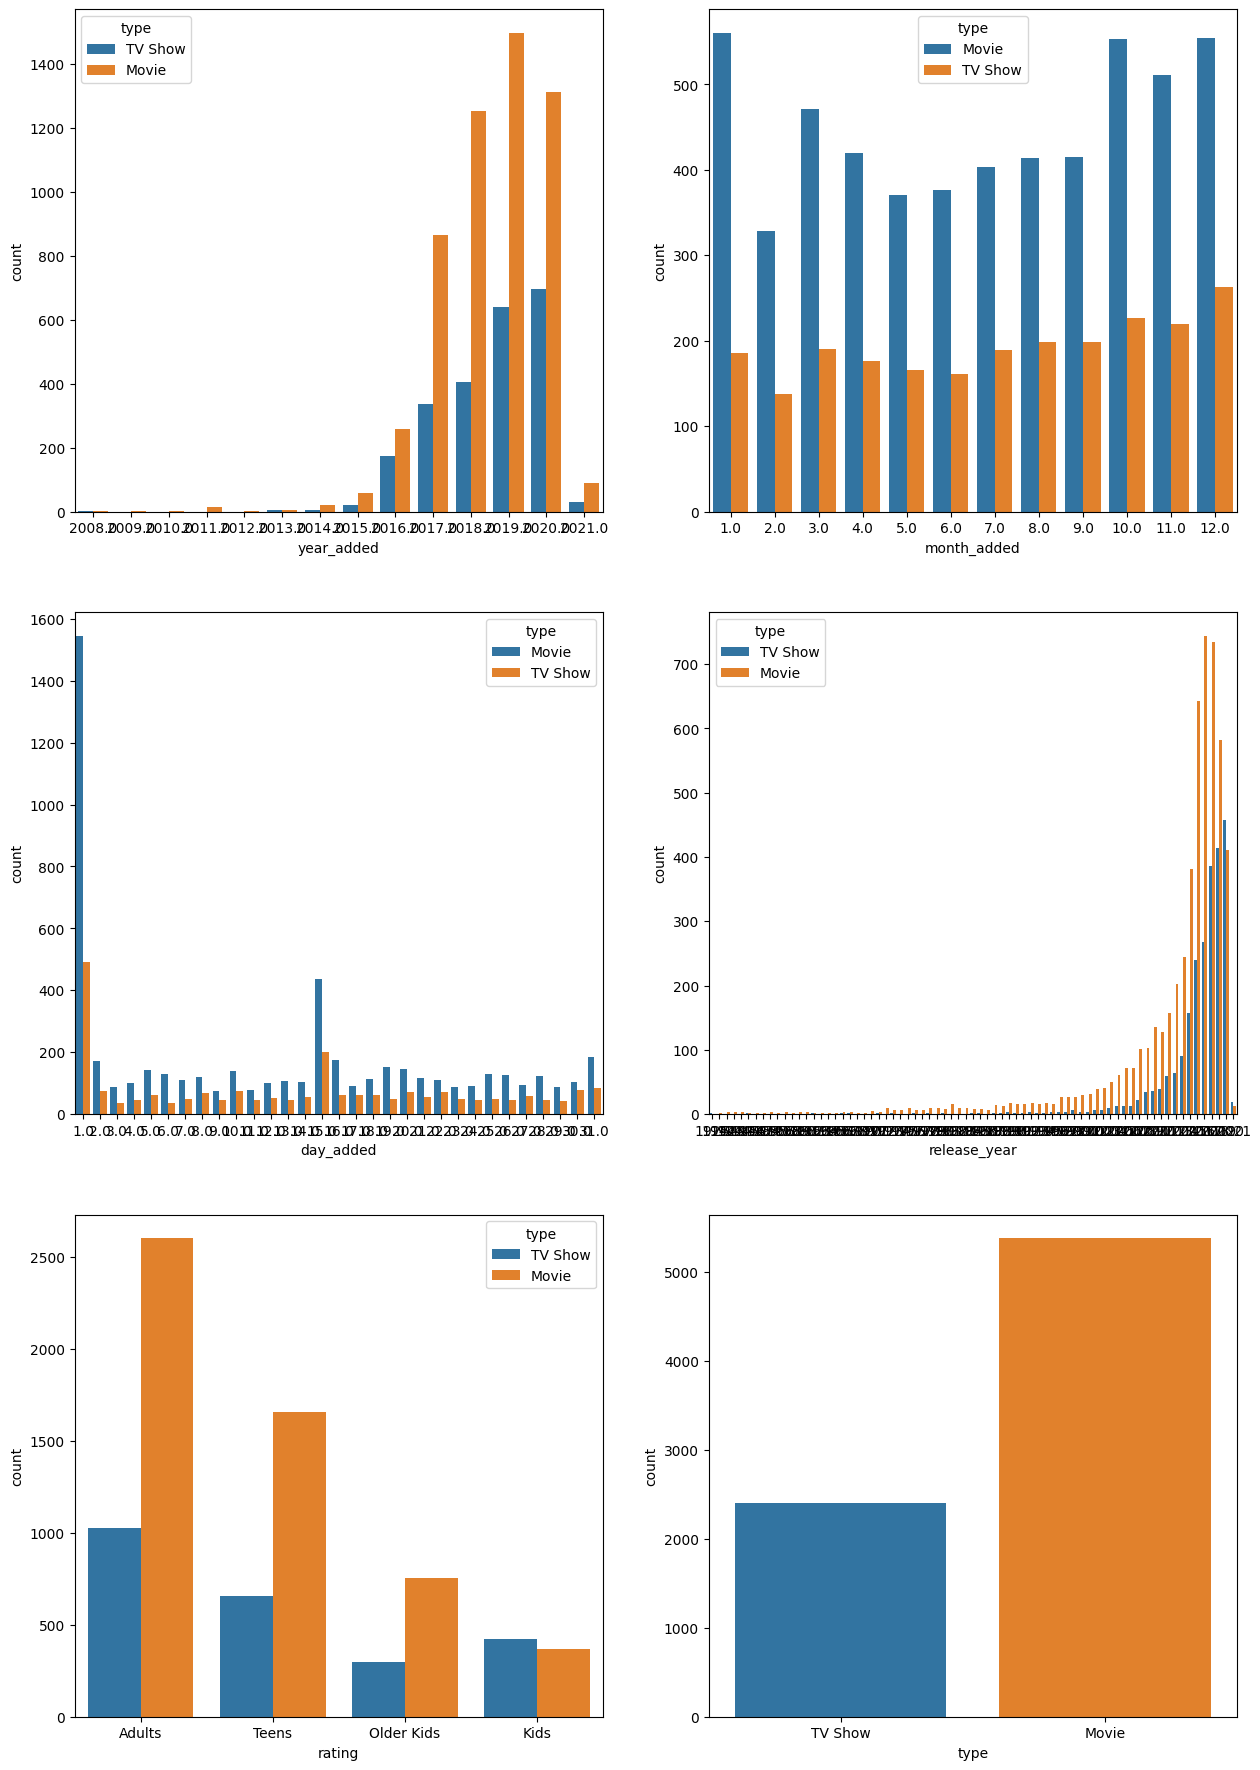

In [ ]:
# counts wrt type of the content.
plt.figure(figsize=(15,30))
for i in enumerate(var):
  plt.subplot(4, 2, i[0]+1)
  sns.countplot(x = i[1], hue = 'type', data = df)


Insights Found:-

Netflix has been increasingly focusing on TV Shows rather than movies in recent years.

Most of the content on Netflix are added in the month of December and January,
in Which movies are added the most.

Maximum contents are added on the first day of the month.

Adding the number of content on Netflix is increased in recent years.

Most of the movies and tv shows are for adults. Very few contents are for kids.

## Type of Content in different Countries

<Axes: xlabel='country', ylabel='count'>

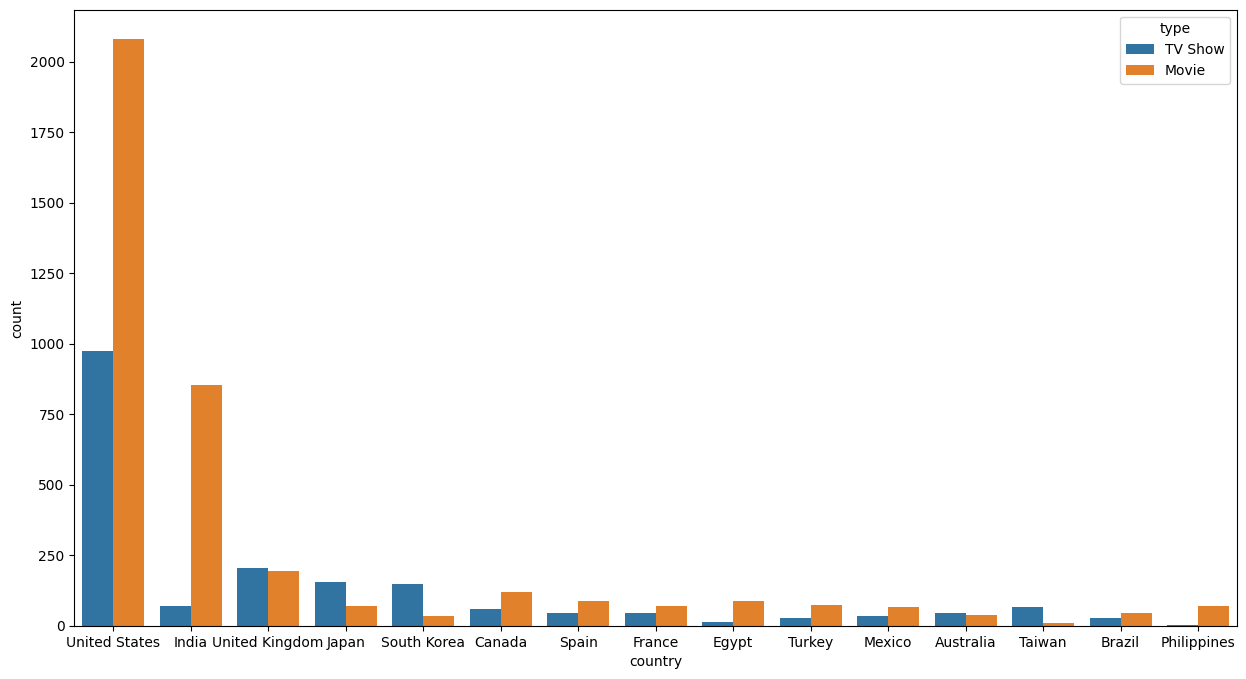

In [ ]:
# total production of country wrt type of the content.
plt.figure(figsize=(15,8))
sns.countplot(x = df['country'], hue='type', data = df, order = df['country'].value_counts().index[:15])

US has the most number of movies and tv shows type content. While India comes in second place for movies on Netflix. But UK comes in second place in terms of tv shows. Followed by South Korea and Canada. Other countries have a very less number of contents added on Netflix.

# **Feature Engineering**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'month_added', 'year_added'],
      dtype='object')

In [ ]:
# combinig the textual data to proceed with NLP
df['text'] = df['cast']+df['listed_in']+df['rating']+df['description']+df['director']+df['country']
df['text'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyAdultsIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.Raúl Campos, Jan SuterBrazil'

### Removing Punctuations and Stopwords

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying function to remove punctuation.
df['text']=df['text'].apply(remove_punctuation)
df['text'][0]

'João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiInternational TV Shows TV Dramas TV SciFi  FantasyAdultsIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorRaúl Campos Jan SuterBrazil'

In [ ]:
# downloading stop words.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# assigning the stopwords to a variable
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [ ]:
# function to remove stopwords from a given text
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying the function on text data.
df['text'] = df['text'].apply(remove_stopwords)
df['text'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschiinternational tv shows tv dramas tv scifi fantasyadultsin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorraúl campos jan suterbrazil'

## **Stemming Operations:Text Normalisation**

In [ ]:
# function for stemming and lemmatization.
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# applying the function on text data.
df['text'] = df['text'].apply(stemming)
df['text'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschiintern tv show tv drama tv scifi fantasyadultsin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorraúl campo jan suterbrazil'

In [ ]:
# tfidf object initialization
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fitting the vectorizer using the text data
tfidf.fit(df['text'])

# collecting the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# converting vector into array form for clustering
X = tfidf.transform(df['text']).toarray()

# summarize encoded vector
print(X)
print(f'shape of the vector : {X.shape}')
print(f'datatype : {type(X)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


# **CONCLUSION**

Majority of the content on Netflix is movies, but in recent years it has been focusing more on Tv-Shows.

Most of the contents are for adults, while very few contents are for teens and kids. On the other side, most of the contents are added in the month of December and January. If I talk about the day, then a majority of the contents are added on the first day of the month followed by the first day of the third week of the month.

Majority of the features have textual value so I applied NLP to that for preprocessing the data. After that, the dimension increased to 10000.

Further, PCA can be applied to reduce dimensionality and perform K-mean clustering.